In [ ]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import random
import numpy as np
from pathlib import Path

def visualize_submission(
    csv_file="output.csv",
    image_dir="../dataset/test",
    num_samples=4,
    score_thr=0.01,
    target_ids=None  # 원하는 image_id
):
    # 1. CSV 로드
    if not os.path.exists(csv_file):
        print(f"Error: {csv_file} 파일을 찾을 수 없습니다.")
        return

    df = pd.read_csv(csv_file)
    df = df[df['PredictionString'].notna()]

    if len(df) == 0:
        print("시각화할 데이터가 없습니다.")
        return

    # 원하는 ID만 선택
    if target_ids is not None:
        # zero padding도 자동 처리
        target_ids = [f"{int(t):04d}" for t in target_ids]  
        sample_df = df[df["image_id"].apply(lambda x: Path(x).stem in target_ids)]
        if len(sample_df) == 0:
            print(f"대상 image_id {target_ids} 를 찾을 수 없습니다.")
            return
        print(f"Using target image IDs: {target_ids}")
    else:
        sample_df = df.sample(n=min(num_samples, len(df)))

    # 서브플롯 크기 자동 설정
    rows = int(np.ceil(len(sample_df) / 2))
    cols = 2
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 7))
    axes = axes.flatten()

    print(f"Visualizing {len(sample_df)} images...")

    for i, (_, row) in enumerate(sample_df.iterrows()):
        image_id = row['image_id']
        pred_str = row['PredictionString']

        img_filename = os.path.basename(image_id)
        img_path = os.path.join(image_dir, img_filename)

        if not os.path.exists(img_path):
            print(f"Image not found: {img_path}")
            continue

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape

        preds = pred_str.strip().split(' ')

        for j in range(0, len(preds), 6):
            if len(preds[j:j+6]) < 6:
                continue

            label = int(preds[j])
            score = float(preds[j+1])
            x1 = float(preds[j+2])
            y1 = float(preds[j+3])
            x2 = float(preds[j+4])
            y2 = float(preds[j+5])

            if score < score_thr:
                continue

            x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])

            color = (0, 255, 0)
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

            text = f"{label}: {score:.2f}"
            cv2.putText(img, text, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
            cv2.putText(img, text, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

        axes[i].imshow(img)
        axes[i].set_title(f"ID: {img_filename}", fontsize=12)
        axes[i].axis('off')

    plt.tight_layout()
    plt.savefig("submission_visualization.png")
    plt.show()
    print("Visualization Saved as 'submission_visualization.png'")


🎯 Using target image IDs: ['0000']
🔍 Visualizing 1 images...


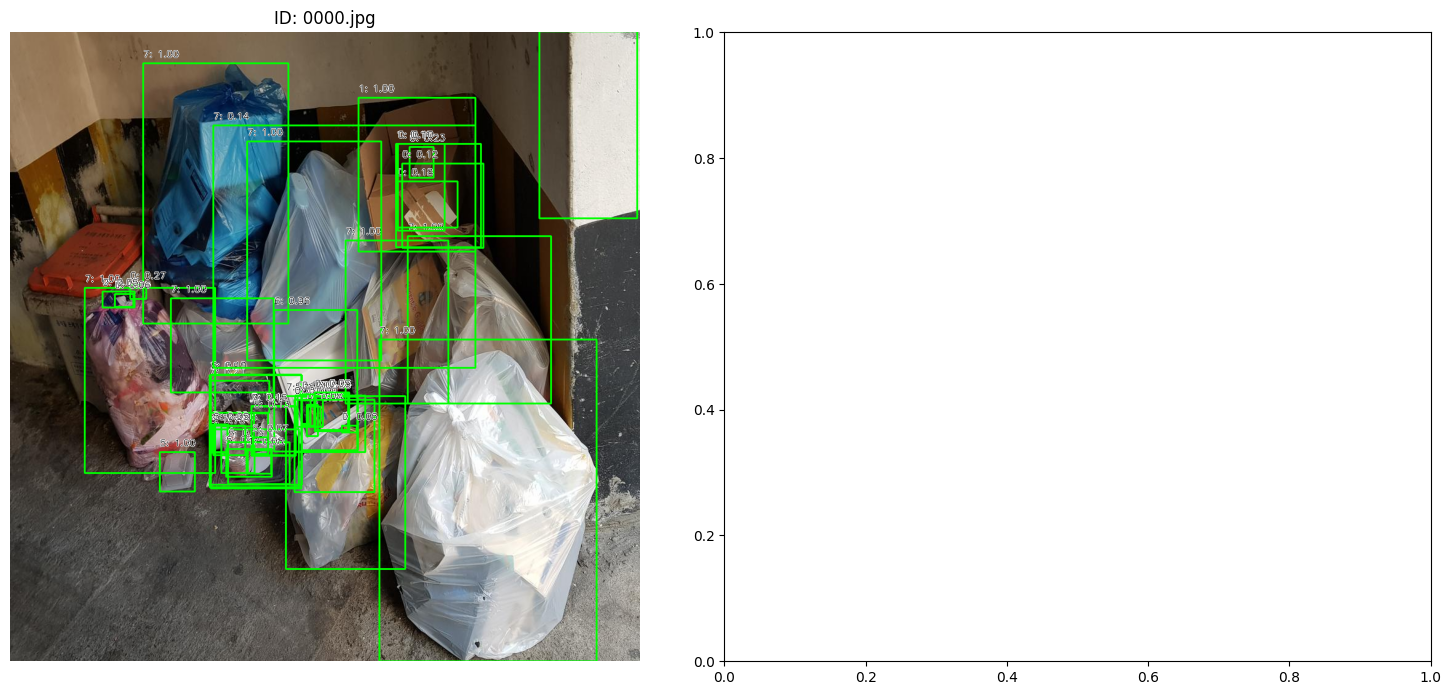

✅ Visualization Saved as 'submission_visualization.png'


In [42]:
visualize_submission(target_ids=["0000"])